00:00:481390
00:00:436098
00:00:521116


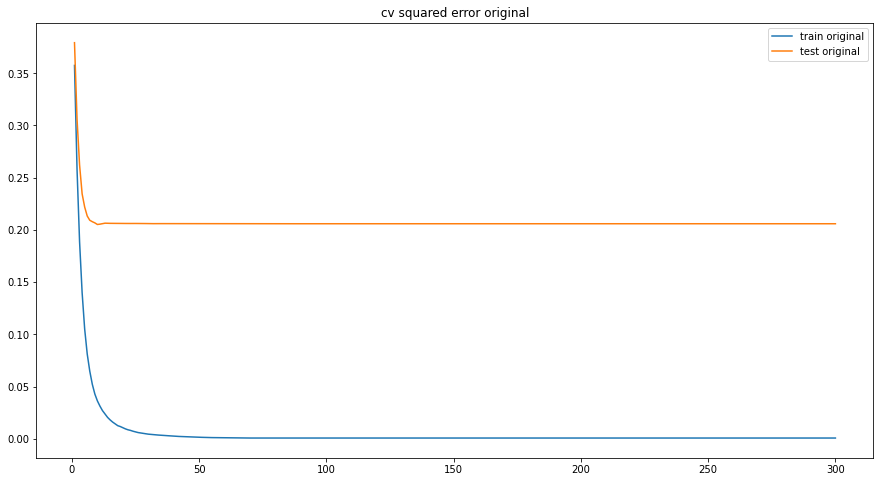

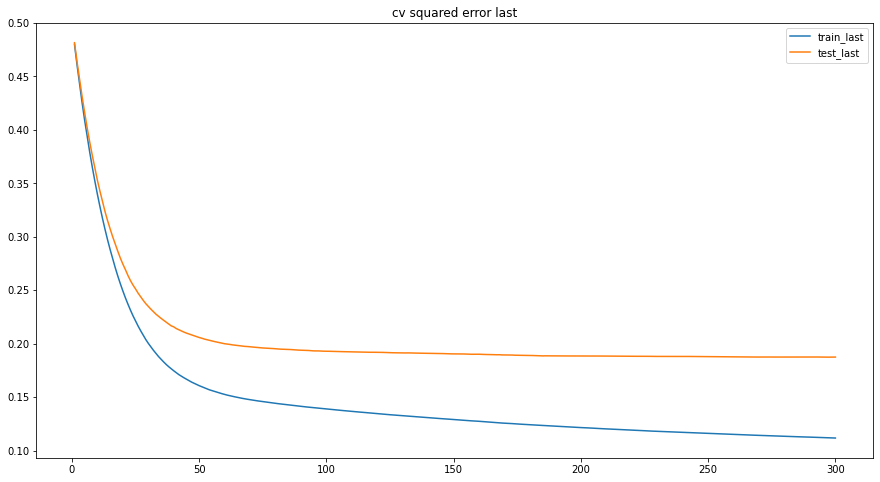

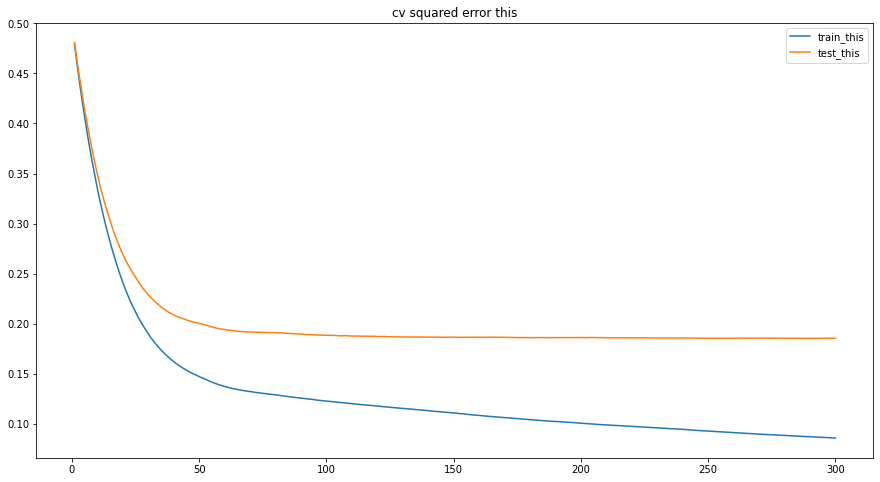

In [34]:
import xgboost as xgb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from time import time
import datetime

from sklearn.datasets import load_breast_cancer

data=load_breast_cancer()
x,y=data.data,data.target

# 随机抽样比例
# max_depth
# colsample_bytree
# colsample_bynode
# colsample_bylevel
# min_child_weight


dfull=xgb.DMatrix(x,y)
paraml={
    'objective':'reg:squarederror'
    ,'subsample':1
    ,'max_depth':5 #最大深度
    ,'eta':0.3
    ,'gamma':0
    ,'lambda':1
    ,'alpha':0
    ,'colsample_bytree':1
    ,'colsample_bylevel':1
    ,'colsample_bynode':1

}
num_round=300
n_fold=5

begin=time()
cvresult=xgb.cv(paraml,dfull,num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-begin).strftime("%M:%S:%f"))


paraml1={
    'objective':'reg:squarederror'
    ,'subsample':1
    ,'max_depth':2 #最大深度
    ,'eta':0.05
    ,'gamma':0
    ,'lambda':1
    ,'alpha':1
    ,'colsample_bytree':1
    ,'colsample_bylevel':0.4
    ,'colsample_bynode':1

}

begin=time()
cvresult1=xgb.cv(paraml1,dfull,num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-begin).strftime("%M:%S:%f"))


paraml2={
    'objective':'reg:squarederror'
    ,'subsample':1
    ,'max_depth':2 #最大深度
    ,'eta':0.05
    ,'gamma':0
    ,'lambda':1
    ,'alpha':0
    ,'colsample_bytree':1
    ,'colsample_bylevel':1
    ,'colsample_bynode':1

}

begin=time()
cvresult2=xgb.cv(paraml2,dfull,num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-begin).strftime("%M:%S:%f"))



def plot(cvresult,num_round,name=None):
    plt.figure(figsize=(15,8))
    if not name:
        plt.plot(range(1,num_round+1),cvresult.iloc[:,0],label="train original")
        plt.plot(range(1,num_round+1),cvresult.iloc[:,2],label="test original")
        plt.title("cv squared error original")
    else:
        plt.plot(range(1,num_round+1),cvresult.iloc[:,0],label="train_"+name)
        plt.plot(range(1,num_round+1),cvresult.iloc[:,2],label="test_"+name)
        plt.title("cv squared error "+name)
    plt.legend()
    plt.show()
    
    
plot(cvresult,num_round)
plot(cvresult1,num_round,"last")
plot(cvresult2,num_round,"this")


# 使用三个图形：original,last,now

In [50]:
# 模型保存和调用
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()
x,y=data.data,data.target



dtrain=xgb.DMatrix(x,y)

param={
    'objective':'reg:squarederror'
    ,'subsample':1
    ,'max_depth':2 #最大深度
    ,'eta':0.05
    ,'gamma':0
    ,'lambda':1
    ,'alpha':1
    ,'colsample_bytree':1
    ,'colsample_bylevel':0.4
    ,'colsample_bynode':1
}

num_round=100
n_fold=5

bst=xgb.train(param,dtrain,num_round)



import pickle
# 保存模型
pickle.dump(bst,open('xgboost_breast_cancer.dat','wb')) #使用二进制写入文件

# 查看当前目录下的文件名
import sys
import os
path=os.getcwd()
filename=os.listdir(path)
print(filename)

# 加载模型
load_model=pickle.load(open(r'xgboost_breast_cancer.dat','rb')) # 使用二进制读取文件


from sklearn.model_selection import train_test_split as TTS
x_train,x_test,y_train,y_test=TTS(x,y,test_size=0.3,random_state=420)
dtest=xgb.DMatrix(x_test,y_test)

# 做预测
y_pred=load_model.predict(dtest)

from sklearn.metrics import mean_squared_error as MSE
MSE(y_test,y_pred) #均方误差

['.ipynb_checkpoints', '01 sklearn_classifier_tree.ipynb', '02 sklearn_regression_tree.ipynb', '03 titanitic.ipynb', '04 sklearn_random_forest_classifier.ipynb', '05 sklearn_random_forest_regressor.ipynb', '06 breast_cancer.ipynb', '07 feature_processing.ipynb', '08 PCA.ipynb', '09 PCA-digits.ipynb', '10 LogisticRegression.ipynb', '11 EvaluateCards.ipynb', '12 kMeans.ipynb', '13 KMeans-VQ.ipynb', '14 SVM.ipynb', '15 SVM-breastCancer.ipynb', '16 SVM advanced.ipynb', '17 SVM_case.ipynb', '18 LinearRegression.ipynb', '19 NonLinearRegression.ipynb', '20 Naive_Bayes.ipynb', '21 Naive_Bayes_case.ipynb', '22 XGBoost.ipynb', '23 XGBoost_application.ipynb', 'data', 'xgboost_breast_cancer.dat']


0.017387601975030084

In [52]:
# 使用joblib
import joblib

joblib.dump(bst,"xgboost_breast_cancer_joblib.dat")
load_model=joblib.load(r'xgboost_breast_cancer_joblib.dat')

y_pred=load_model.predict(dtest)
MSE(y_test,y_pred)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9277591830986283

In [56]:
# 使用XGBR
from xgboost import XGBRegressor as XGBR

bst=XGBR(n_estimators=100
        ,eta=0.5
        ,gamma=20
        ,reg_lambda=3
        ,reg_alpha=0.2
        ,max_depth=4
        ,colsample_bytree=0.4
        ,colsample_bylevel=0.6).fit(x_train,y_train)

joblib.dump(bst,"XGBR_breast_cancer_joblib.dat")
load_model=joblib.load(r'XGBR_breast_cancer_joblib.dat')

y_pred=load_model.predict(x_test)
MSE(y_test,y_pred)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6697451421853384

### 处理分类案例（处理样本不均衡问题）

##### scale_pos_weight :控制正负样本比例，表示为负：正的样本比例


In [89]:
import numpy as np
import pandas as np
import matplotlib.pyplot as plt
import xgboost as xgb

from xgboost import XGBClassifier as XGBC
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import confusion_matrix as cm,recall_score as recall,roc_auc_score as auc


# 创建数据集
def load_data():
    class_1=5000
    class_2=500
    centers=[[0,0],[3,3]]
    cluster_std=[1.5,0.5]
    x,y=make_blobs(n_samples=[class_1,class_2],centers=centers,cluster_std=cluster_std,random_state=0,shuffle=False)
    return x,y

# 划分数据集
def data_split(x,y):
    x_train,x_test,y_train,y_test=TTS(x,y,test_size=0.3,random_state=0)
    return x_train,x_test,y_train,y_test

# 建模与评估(使用XGBC)
def model(scale_pos_weight):
    x,y=load_data()
    x_train,x_test,y_train,y_test=data_split(x,y)
    clf=XGBC(eval_metric=['logloss','auc','error']).fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    
    score=clf.score(x_test,y_test) #准确率 
    r=recall(y_test,y_pred) #召回
    a=auc(y_test,clf.predict_proba(x_test)[:,1]) #auc
    cm(y_test,y_pred,labels=[1,0]) #混淆矩阵
    
    print("original recall %f"%r)
    print("original score %f"%score)
    print("original auc %f"%a)
    #负正样本比例
    clf_=XGBC(scale_pos_weight=scale_pos_weight,eval_metric=['logloss','auc','error']).fit(x_train,y_train)
    y_pred_=clf_.predict(x_test)
    score_=clf_.score(x_test,y_test) 
    r_=recall(y_test,y_pred_) #召回
    a_=auc(y_test,clf_.predict_proba(x_test)[:,1]) #auc
    cm(y_test,y_pred_,labels=[1,0]) #混淆矩阵
    
    print("scale_pos_weight %d recall %f"%(scale_pos_weight,r_))
    print("scale_pos_weight %d  score %f"%(scale_pos_weight,score_))
    print("scale_pos_weight %d  auc %f"%(scale_pos_weight,a_))
    print("\n")
    

from sklearn.metrics import accuracy_score as accuracy

# 使用xgboost
def model1(scale_pos_weight,names):
    x,y=load_data()
    x_train,x_test,y_train,y_test=data_split(x,y)
    
    # 使用特有格式
    dtrain=xgb.DMatrix(x_train,y_train)
    dtest=xgb.DMatrix(x_test,y_test)
    
    for i in range(len(scale_pos_weight)):
        # 参数
        param={
            'objective':'binary:logistic'
            ,'eta':0.1
            ,'scale_pos_weight':i
            ,'eval_metric':['logloss','auc','error']
        }
        n_round=100

        bst=xgb.train(param,dtrain,num_round)

        # 预测(返回分类概率)
        y_pred=bst.predict(dtest)

        # 自定义阈值
        for threshold in [i/10 for i in range(3,7)]:
            y_pred_=y_pred.copy()
            y_pred_[y_pred_>0.5]=1
            y_pred_[y_pred_!=1]=0

            r=recall(y_test,y_pred_) #召回
            au=auc(y_test,y_pred_) #auc
            acc=accuracy(y_test,y_pred_)#正确率

            print("%s  %.1f recall %f "%(names[i],threshold,r))
            print("%s  %.1f accuracy %f"%(names[i],threshold,acc))
            print("%s  %.1f auc %f"%(names[i],threshold,au))
            print("\n")

    

# for weight in range(0,100,10):
#    model(weight)

scale_pos_weight=[1,5,10]
names=[
    'negative vs positive :1'
    ,'negative vs positive :5'
     ,'negative vs positive :10'
]
model1(scale_pos_weight,names)


negative vs positive :1  0.3 recall 0.000000 
negative vs positive :1  0.3 accuracy 0.914545
negative vs positive :1  0.3 auc 0.500000


negative vs positive :1  0.4 recall 0.000000 
negative vs positive :1  0.4 accuracy 0.914545
negative vs positive :1  0.4 auc 0.500000


negative vs positive :1  0.5 recall 0.000000 
negative vs positive :1  0.5 accuracy 0.914545
negative vs positive :1  0.5 auc 0.500000


negative vs positive :1  0.6 recall 0.000000 
negative vs positive :1  0.6 accuracy 0.914545
negative vs positive :1  0.6 auc 0.500000


negative vs positive :5  0.3 recall 0.985816 
negative vs positive :5  0.3 accuracy 0.992727
negative vs positive :5  0.3 auc 0.989594


negative vs positive :5  0.4 recall 0.985816 
negative vs positive :5  0.4 accuracy 0.992727
negative vs positive :5  0.4 auc 0.989594


negative vs positive :5  0.5 recall 0.985816 
negative vs positive :5  0.5 accuracy 0.992727
negative vs positive :5  0.5 auc 0.989594


negative vs positive :5  0.6 recall 0.985